In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from petsc4py import PETSc

%matplotlib inline

import conduction
help(conduction)

Help on package conduction:

NAME
    conduction

FILE
    /opt/ben/git/conduction/__init__.py

PACKAGE CONTENTS
    interpolation (package)
    refinement (package)
    solver (package)




In [2]:
minX, maxX = 0., 1.
minY, maxY = 0., 2.
minZ, maxZ = 0., 3.

nx, ny, nz = 10, 10, 10

mesh = conduction.Conduction3D((minX, minY, minZ), (maxX, maxY, maxZ), (nx, ny, nz))

In [3]:
def z_function(z):
    return 1.0 - np.exp(z)

# np.column_stack([z_function(mesh.coords[:,2]), mesh.coords[:,2]])

# mesh.refine(z_fn=z_function)

## Update material properties

In [4]:
coords = mesh.coords

nx = mesh.nx
ny = mesh.ny
nz = mesh.nz

k = np.ones(nz*ny*nx)
H = np.ones(nz*ny*nx)
# H.fill(0.)

mask = coords[:,0] >= 0.5

k[mask] = 5.

mesh.update_properties(k, H)

##  Boundary conditions

In [5]:
mesh.boundary_condition('minZ', 1.0, flux=True)
mesh.boundary_condition('maxZ', 0.0, flux=False)

In [6]:
sol = mesh.solve()

999 999


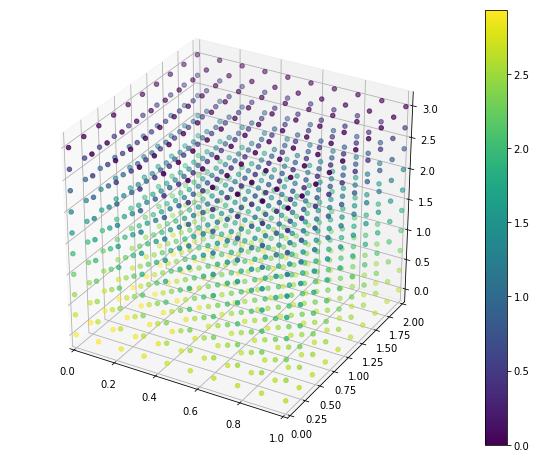

In [7]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111, projection='3d', xlim=(minX, maxX), ylim=(minY, maxY),)
sca = ax1.scatter3D(coords[:,0], coords[:,1], coords[:,2], c=sol)
fig.colorbar(sca)

# Refine

Refine the Y-axis

In [8]:
def z_function(z):
    return 1.0 - np.exp(z)

mesh.refine(z_fn=z_function)

In [9]:
mesh.boundary_condition('minZ', 1.0, flux=True)
mesh.boundary_condition('maxZ', 0.0, flux=False)

mesh.update_properties(k, H)

In [10]:
for key in mesh.bc:
    print key, mesh.bc[key]['delta'], mesh.bc[key]['flux'], mesh.bc[key]['val']

print mesh.minZ, mesh.maxZ

maxZ 0.395612425086 False 0.0
maxX 0.111111111111 True 0.0
maxY 0.222222222222 True 0.0
minX 0.111111111111 True 0.0
minY 0.222222222222 True 0.0
minZ 5.69362082804 True -0.175635159102
-19.0855369232 0.0


In [11]:
sol2 = mesh.solve()

999 999


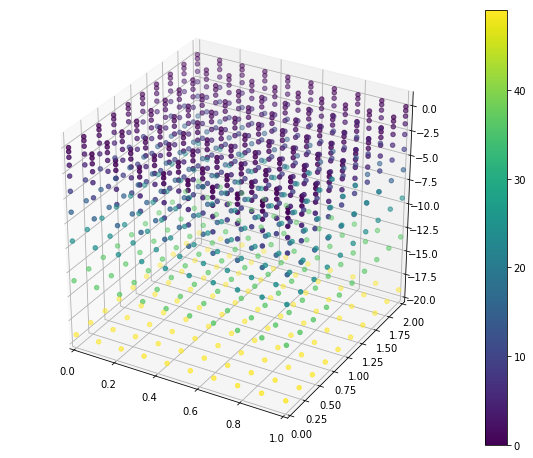

In [12]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111, projection='3d', xlim=(minX, maxX), ylim=(minY, maxY), )
sca = ax1.scatter3D(coords[:,0], coords[:,1], coords[:,2], c=sol2)
fig.colorbar(sca)
plt.savefig('rectilinear.png', bbox_inches='tight')

In [22]:
from quagmire import tools as meshtools
meshtools.save_DM_to_hdf5(mesh.dm, 'rectilinear.h5')

vec = mesh.dm.createGlobalVector()
vec.setName('sol')
vec.setArray(sol2)

ViewHDF5 = PETSc.Viewer()

ViewHDF5.createHDF5('rectilinear.h5', mode='a')
ViewHDF5.pushFormat(PETSc.Viewer.Format.VTK_VTR)
ViewHDF5.view(obj=vec)
ViewHDF5.destroy()

# meshtools.generate_xdmf('rectilinear.h5')

In [20]:
# ViewHDF5.pushFormat(PETSc.Viewer.Format.VTK_VTR)
ViewHDF5.destroy()